# STEP 3

In [3]:
import pandapower.networks as nw
import pandapower as pp
import pandas as pd
import pandapower.plotting as plot
import matplotlib.pyplot as plt
import numpy as np
from openpyxl import load_workbook
net=nw.create_cigre_network_mv()
net.bus_geodata


,x,y,coords
0,7.0,16,NaN
1,4.0,15,NaN
2,4.0,13,NaN
3,4.0,11,NaN
4,2.5,9,NaN
5,1.0,7,NaN
6,1.0,3,NaN
7,8.0,3,NaN
8,8.0,5,NaN
9,6.0,5,NaN


## add tranformer and load to the grid (bus 4, 7, 8, 13, 14)

In [57]:
net=nw.create_cigre_network_mv()

bus15 = pp.create_bus(net, vn_kv=0.4, geodata=[2.5, 6], name="Bus 15")
trafo = pp.create_transformer(net, hv_bus=4, lv_bus=bus15, std_type="0.63 MVA 20/0.4 kV", name="Trafo 4-15")

bus16 = pp.create_bus(net, vn_kv=0.4, geodata=[8, 0], name="Bus 16")
trafo = pp.create_transformer(net, hv_bus=7, lv_bus=bus16, std_type="0.63 MVA 20/0.4 kV", name="Trafo 7-16")

bus17 = pp.create_bus(net, vn_kv=0.4, geodata=[8, 9], name="Bus 17")
trafo = pp.create_transformer(net, hv_bus=8, lv_bus=bus17, std_type="0.63 MVA 20/0.4 kV", name="Trafo 8-17")

bus18 = pp.create_bus(net, vn_kv=0.4, geodata=[12, 11], name="Bus 18")
trafo = pp.create_transformer(net, hv_bus=13, lv_bus=bus18, std_type="0.63 MVA 20/0.4 kV", name="Trafo 13-18")

bus19 = pp.create_bus(net, vn_kv=0.4, geodata=[10, 2], name="Bus 19")
trafo = pp.create_transformer(net, hv_bus=14, lv_bus=bus19, std_type="0.63 MVA 20/0.4 kV", name="Trafo 14-19")

bus20 = pp.create_bus(net, vn_kv=0.4, geodata=[12, 8], name="Bus 20")
trafo = pp.create_transformer(net, hv_bus=13, lv_bus=bus20, std_type="0.63 MVA 20/0.4 kV", name="Trafo 13-20")

bus21 = pp.create_bus(net, vn_kv=0.4, geodata=[12, 2], name="Bus 21")
trafo = pp.create_transformer(net, hv_bus=14, lv_bus=bus21, std_type="0.63 MVA 20/0.4 kV", name="Trafo 14-21")

bus22 = pp.create_bus(net, vn_kv=0.4, geodata=[-1, 7], name="Bus 22")
trafo = pp.create_transformer(net, hv_bus=5, lv_bus=bus22, std_type="0.4 MVA 20/0.4 kV", name="Trafo 5-22")

bus23 = pp.create_bus(net, vn_kv=0.4, geodata=[-1, 3], name="Bus 23")
trafo = pp.create_transformer(net, hv_bus=6, lv_bus=bus23, std_type="0.4 MVA 20/0.4 kV", name="Trafo 6-23")


# add new loads
pp.create_load(net, bus=bus15, p_mw=14.99400, q_mvar=0, name="CS_1")
pp.create_load(net, bus=bus16, p_mw=14.99400, q_mvar=0, name="CS_2")
pp.create_load(net, bus=bus17, p_mw=14.99400, q_mvar=0, name="CS_3")
pp.create_load(net, bus=bus18, p_mw=14.99400, q_mvar=0, name="CS_4")
pp.create_load(net, bus=bus19, p_mw=14.99400, q_mvar=0, name="CS_5")
pp.create_load(net, bus=bus20, p_mw=14.99400, q_mvar=0, name="CS_6")
pp.create_load(net, bus=bus21, p_mw=14.99400, q_mvar=0, name="CS_7")
pp.create_load(net, bus=bus22, p_mw=14.99400, q_mvar=0, name="CS_8")
pp.create_load(net, bus=bus23, p_mw=14.99400, q_mvar=0, name="CS_9")
print(net.load)



         name  bus      p_mw    q_mvar  const_z_percent  const_i_percent  \
0     Load R1    1  14.99400  3.044662              0.0              0.0   
1     Load R3    3   0.27645  0.069285              0.0              0.0   
2     Load R4    4   0.43165  0.108182              0.0              0.0   
3     Load R5    5   0.72750  0.182329              0.0              0.0   
4     Load R6    6   0.54805  0.137354              0.0              0.0   
5     Load R8    8   0.58685  0.147078              0.0              0.0   
6    Load R10   10   0.47530  0.119121              0.0              0.0   
7    Load R11   11   0.32980  0.082656              0.0              0.0   
8    Load R12   12  14.99400  3.044662              0.0              0.0   
9    Load R14   14   0.20855  0.052268              0.0              0.0   
10   Load CI1    1   4.84500  1.592474              0.0              0.0   
11   Load CI3    3   0.22525  0.139597              0.0              0.0   
12   Load CI

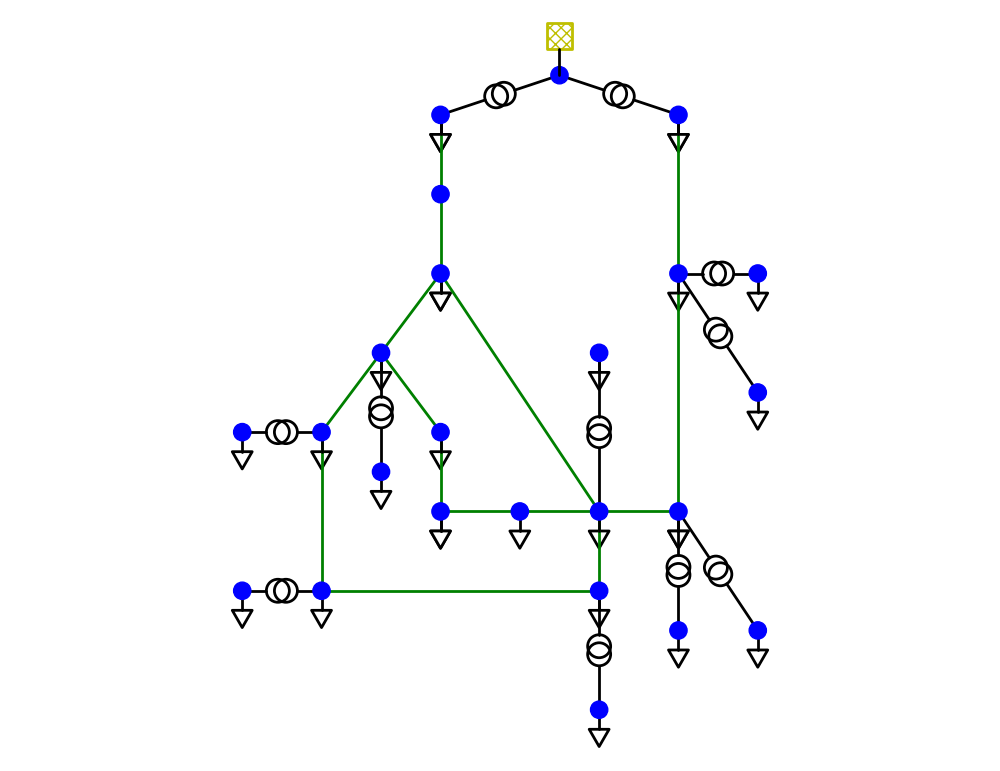

In [58]:
# Step 2: Run a power flow calculation
#pp.runpp(net)

# Step 3: Plot the network
# Customize the plotting with bus colors, line colors, etc.
plot.simple_plot(
    net,
    respect_switches=False,   # Respect switch positions
    line_width=2.0,           # Line thickness
    bus_size=1.5,             # Size of the bus markers
    ext_grid_size=1.5,        # Size of the external grid symbol
    trafo_size=2.0,           # Size of transformers
    plot_loads=True,          # Plot loads
    plot_sgens=False,         # Plot static generators (optional)
    load_size=2,              # Size of the load markers
    bus_color='b',            # Color for buses (blue)
    line_color='g',           # Color for lines (green)
    trafo_color='k',          # Color for transformers (black)
    ext_grid_color='y',       # Color for external grid (yellow)
    show_plot=True            # Show the plot
)

# Step 4: Show the plot using matplotlib (optional if show_plot=True)
plt.show()

## Import daily data about EVs

In [32]:
def read_load_shape(filename):
    with open(filename, 'r') as file:
        loadshape = file.read().splitlines()
    #Convert Load shape into float
    loadshape = np.array(loadshape, dtype=float)
    return loadshape
loadshape= read_load_shape('step_3_new_loadshape.txt')




# STEP 4: ADD PVs

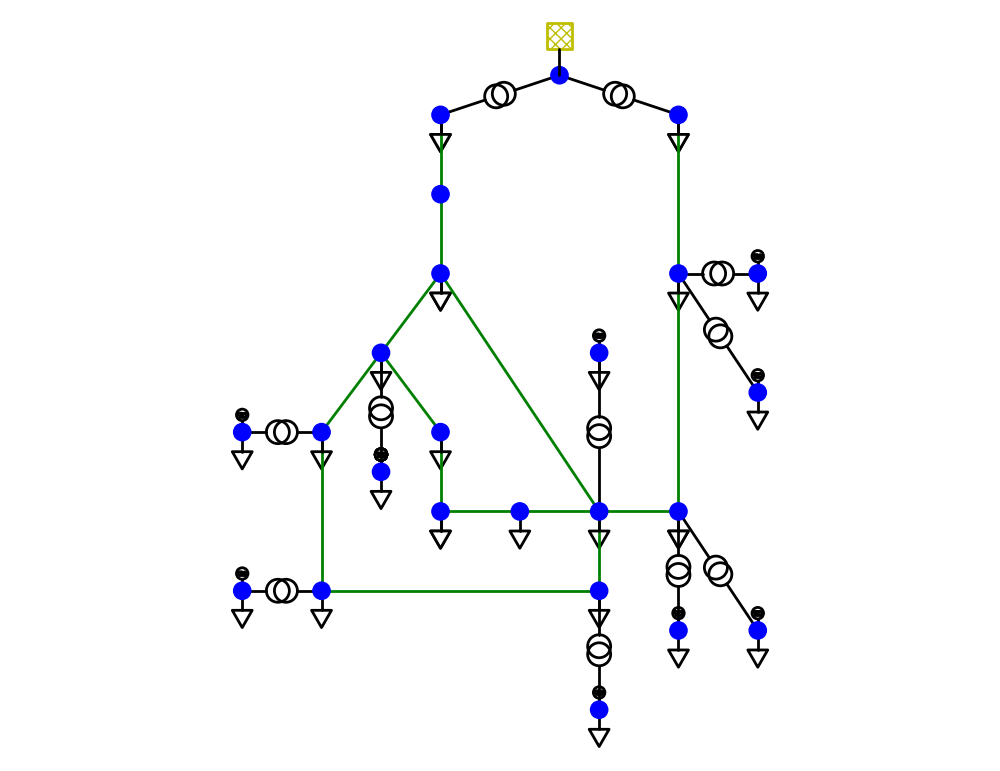

In [71]:
pv_buses = [bus15, bus16, bus17, bus18, bus19, bus20, bus21, bus22, bus23]  # Bus where you want to connect the PV system
pv_p_mw = 0.03  # PV active power generation in MW
pv_q_mvar = 0.0  # Reactive power is 0 if the inverter is operating at unity power factor

for i, pv_bus in enumerate(pv_buses):
    pp.create_sgen(net, bus=pv_bus, p_mw=pv_p_mw, q_mvar=pv_q_mvar, name=f"PV System {i+1}")

plot.simple_plot(
    net,
    respect_switches=False,   # Respect switch positions
    line_width=2.0,           # Line thickness
    bus_size=1.5,             # Size of the bus markers
    ext_grid_size=1.5,        # Size of the external grid symbol
    trafo_size=2.0,           # Size of transformers
    plot_loads=True,          # Plot loads
    plot_sgens=True,         # Plot static generators (optional)
    load_size=2,              # Size of the load markers
    bus_color='b',            # Color for buses (blue)
    line_color='g',           # Color for lines (green)
    trafo_color='k',          # Color for transformers (black)
    ext_grid_color='y',       # Color for external grid (yellow)
    show_plot=True,            # Show the plot
)

# Step 4: Show the plot using matplotlib (optional if show_plot=True)
plt.show()

### Add storage

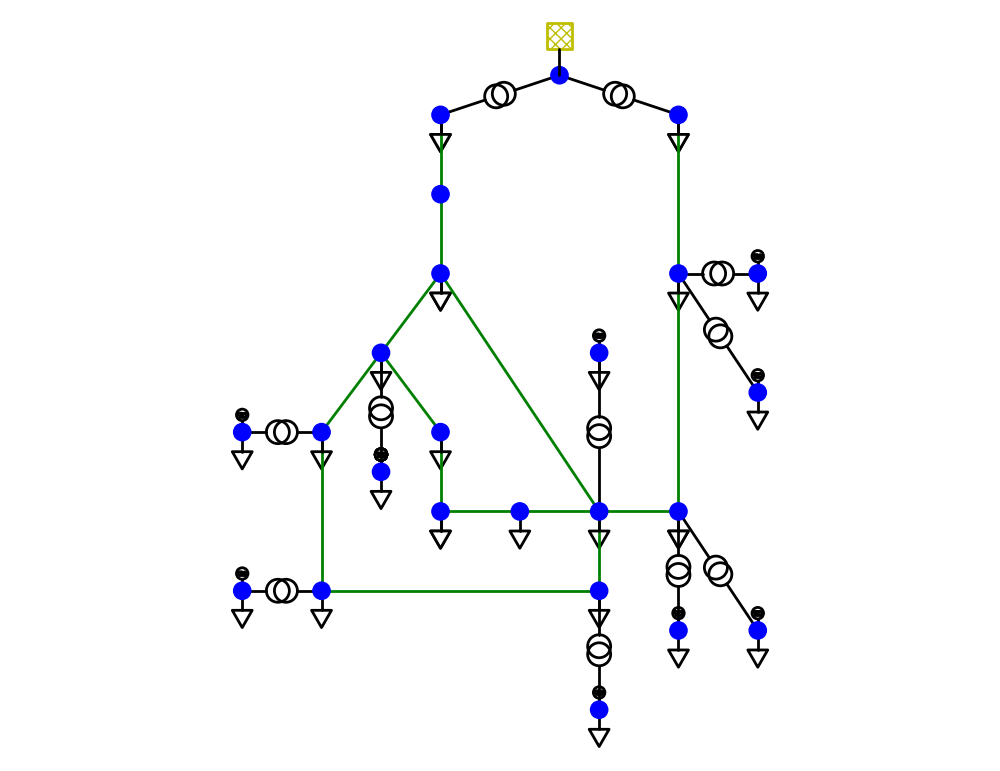

In [73]:
storage_capacity_mw = 0.03  # Storage capacity in MW
storage_capacity_mwh = 0.1  # Storage capacity in MWh

for i, pv_bus in enumerate(pv_buses):
    pp.create_storage(net, bus=pv_bus, p_mw=0, max_p_mw=storage_capacity_mw, min_p_mw=-storage_capacity_mw, max_e_mwh=storage_capacity_mwh, soc_percent=0, name=f"Storage {i+1}")

plot.simple_plot(
    net,
    respect_switches=False,   # Respect switch positions
    line_width=2.0,           # Line thickness
    bus_size=1.5,             # Size of the bus markers
    ext_grid_size=1.5,        # Size of the external grid symbol
    trafo_size=2.0,           # Size of transformers
    plot_loads=True,          # Plot loads
    plot_sgens=True,         # Plot static generators (optional)
    load_size=2,              # Size of the load markers
    bus_color='b',            # Color for buses (blue)
    line_color='g',           # Color for lines (green)
    trafo_color='k',          # Color for transformers (black)
    ext_grid_color='y',       # Color for external grid (yellow)
    show_plot=True,            # Show the plot
)

# Step 4: Show the plot using matplotlib (optional if show_plot=True)
plt.show()